### Downloading the library PyGame

For this assignemnt I decided to use the library PyGame as it allows for a way of animating the simuation. In order to download the library eneter the anaconda prompt and type 'pip install pygame'.

1. Assume for the moment that there is only one disk in the box. Write a Python function that takes the position and velocity of that disk, and computes the time of the first collision with any of the four walls, as well as the updated velocities right after this collision.

In [1]:
#I import the libraries at every step because when something goes wrong the whole notebook dies and requires to re-run everything
import pygame
import math
import time

#initialize the pygame
pygame.init()

#create the square window rez x rez
rez = 500
screen = pygame.display.set_mode((rez,rez))

#title of the program
pygame.display.set_caption('Gas Particles')

#starting coordinates of the particle
x,y = 250,470 

# From my laptop specifications I know that its width is 34.53531 cm (converted from inches). The pygame.display.set_mode seems
# that it can be maximally set to 1540 units in width in order to fit the whole width of the screen (for set resolution 
# 1920x1080 on my laptop in the settings) so every 1 unit of pygame.display.set_mode is equal 
# to 34.53531 / 1540 = 0.02242552538 cm


#velocities in the pygame units aka 'move this many units on the grid in the x/y direction'
vx,vy = -3, 5

# velocities in SI units
vx_si = vx*0.02242552538*60 #[cm/s]
vy_si = vy*0.02242552538*60 #[cm/s]

r = 20 #radious of the particle

#Statement later allowing to stop the program (or more specifically break the while loop)
run = True

#variables for counting time
start,stop=0,0
count = 0

#fucntion for changing the position where the particle should be projected in the prompt window
def particle_move(x,y):
    pygame.draw.circle(screen, (220,220,255), (int(round(x)),int(round(y))), r)

    
clock = pygame.time.Clock() ##create an object to help track time
start = pygame.time.get_ticks() #take the first time that passed since reading pygame.init()
    
while run:
    #this tunrs run to False when exit button is clicked
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False

    #updating the velocity values
    vx_si = vx*0.02242552538*60 #[cm/s]
    vy_si = vy*0.02242552538*60 #[cm/s]
    screen.fill((200,200,200))
    
    #NOTE: it is not necessary to add the corner if statments, the algorithm works just fine without it although then it counts
    #a corner hit as two separate hits (in a very short time) printing two records of velocity except for one.
    
    if (x<=r) & (y<=r): #left top corner boink
        
        #in case the ball 'collapses' into the wall I just move it back where it should be
        x=r
        y=r
        
        #updated velocities
        vx = -vx
        vy = -vy
        
        stop = pygame.time.get_ticks() #take the time of when the program read this line
        
        if count<5:
            #data about the particle once it hits the wall
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start #the time passed after the program was initialised
        count+=1
    
    #similar logic follows the other hit cases
    
    elif (x>=rez-r) & (y>=rez-r): #right bottom corner boink
        
        x=rez-r
        y=rez-r
        vx = -vx
        vy = -vy
        stop = pygame.time.get_ticks()
        
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1
    
    elif (x>=rez-r) & (y<=r): #right top corner boink
        
        x=rez-r
        y=r
        vx = -vx
        vy = -vy
        stop = pygame.time.get_ticks()

        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1

        
    elif (x<=r) & (y>=rez-r): #left bottom corner boink
        
        x=r
        y=rez-r
        vx = -vx
        vy = -vy
        stop = pygame.time.get_ticks()
        
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1
        
    elif x<=r: #left wall
        
        x=r
        vx = -vx
        stop = pygame.time.get_ticks()
        
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1
        
    elif x>=rez-r: #right wall
        
        x=rez-r
        vx = -vx
        stop = pygame.time.get_ticks()
        
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1
        
    elif y<=r: #upper wall
        
        y=r
        vy = -vy
        stop = pygame.time.get_ticks()
        
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1
        
    elif y>=rez-r: #lower wall
        
        y=rez-r
        vy = -vy
        stop = pygame.time.get_ticks()
       
        if count<5:
            print(str(count+1)+'. time:'+str((stop-start)/1000)+' [s]'+' vx:'
            +str(round(vx_si,2))+' [cm/s]'+' vy:'+str(round(vy_si,2))+' [cm/s]'+' v:'
            + str(round(math.sqrt(vx_si**2+vy_si**2),2))+' [cm/s]')
            
        start+=stop-start
        count+=1

    #update the positional coordinates od the ball
    x += vx
    y += vy
    
    #'move' the particle
    particle_move(x,y)
    
    #project the picture in the window
    pygame.display.update() 
    
    clock.tick(60) # sets the max number of fps, this way the movement is smooth. Which also means that the time it takes for
    # the next frame to load is t = 1/60 [s] = 0.01(6) [s]

#stop the program, close the window
pygame.quit()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
1. time:0.035 [s] vx:-4.04 [cm/s] vy:6.73 [cm/s] v:7.85 [cm/s]
2. time:1.244 [s] vx:-4.04 [cm/s] vy:-6.73 [cm/s] v:7.85 [cm/s]
3. time:0.281 [s] vx:4.04 [cm/s] vy:-6.73 [cm/s] v:7.85 [cm/s]
4. time:1.519 [s] vx:4.04 [cm/s] vy:6.73 [cm/s] v:7.85 [cm/s]
5. time:0.752 [s] vx:4.04 [cm/s] vy:-6.73 [cm/s] v:7.85 [cm/s]


2. Assume for the moment that there are no walls, and only two balls. Write a Python function that takes the velocities and positions of two balls, and computes whether a collision will take place, and when.

I tried two approaches: 
1. Trying to offest the overlap by moving the particles away from each other (the change is signalised by a red dot in left top corner). Although things can get messy with the collision of more than two balls as the program can just push a particle into another particle while trying to push it out of another one.
2. Increasing the framerate of the program, it surely is not optimal as it requires 10 times as much computational power but in the end its accuracy persuaded me.

Although the combination of both might work best I chose to just stick to the 2nd approach as it looks cleaner to me and makes the code less complicated for now.

Approach 1

In [2]:
import pygame
import math
import time
import numpy as np

#initialize the pygame
pygame.init()
#create the window
rez = 600
screen = pygame.display.set_mode((rez,rez))
#title
pygame.display.set_caption('Gas Particles')
clock = pygame.time.Clock()

x1,y1,vx1,vy1 = 500,500,-1,-1.4

x2,y2,vx2,vy2 = 100,100,11,9

r = 30 #radious of the particle

c = 100 #arbitrarly chosen value of how many steps can the particles drift apart before closing the console so that I have
#time to see what is going on.
beginning = c #variable that has the same value as c just so we know when c is just starting to work
d = np.array([0.0,0.0])

run = True

clock = pygame.time.Clock()
start = pygame.time.get_ticks()

class Particle:
    def __init__(self,x,y,vx,vy,color):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.color = color
    
    def update(self):
        self.x += self.vx
        self.y += self.vy
        return self.x,self.y
    def move(self):
        pygame.draw.circle(screen, self.color , (round(self.x),round(self.y)), r)
    
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False
    screen.fill((200,200,200))
    
    d[0] = math.sqrt((x2-x1)**2 + (y2-y1)**2) #calculate the distance between the origins
    
    if d[0] <= 2*r and beginning == c:
        print('The particles cannot start by touching each other. Choose different origin points')
        vx1,vx2,vy1,vy2 = 0,0,0,0
        run = False
        
        
    particle1 = Particle(x1,y1,vx1,vy1,(255,0,255))
    particle1.update()
    x1 = particle1.x 
    y1 = particle1.y
    particle1.move()
    
    particle2 = Particle(x2,y2,vx2,vy2,(0,0,255))
    particle2.update()
    x2 = particle2.x 
    y2 = particle2.y 
    particle2.move()
    pygame.display.update() 
    clock.tick(60)
    
    v1 = math.sqrt(vx1**2 + vy1**2)
    v2 = math.sqrt(vx2**2 + vy2**2)
    
    if d[0] <= 2*r and beginning == c:
        pygame.time.wait(2000)
    
    elif (vx1 == vx2 and vy1 == vy2) or (vx1 == 0 and vx2 == 0 and vy1 == 0 and vy2 == 0):
        print('The particles do not collide.')
        pygame.time.wait(2000)
        run = False
            
    elif d[0] <= 2*r:
        stop = pygame.time.get_ticks()
        print('The particles collide. Time: '+str((stop-start)/1000)+' [s]')
        pygame.time.wait(500)
        
        apart = (2*r-d[0]) #i dont take the full length but only half in case there is triple collision
        
        #the coefficient by which the component vectors should be multiplied by ('shortened by')
        scale1 = apart/v1
        scale2 = apart/v2
        
        x1 = x1 - vx1*scale1
        y1 = y1 - vy1*scale1
        
        x2 = x2 - vx2*scale2
        y2 = y2 - vy2*scale2
        
        screen.fill((200,200,200))
        pygame.draw.circle(screen,(255,0,255)  , (int(round(x1)),int(round(y1))), r)
        pygame.draw.circle(screen, (0,0,255) , (int(round(x2)),int(round(y2))), r)
        pygame.draw.circle(screen, (255,0,0) , (int(round(50)),int(round(50))), 15)
        pygame.display.update() 
        pygame.time.wait(2000)
        run = False
        
    if d[0] > d[1]: #checks if they are drifting apart or staying in the same place
        c-=1
    
    if c == 0: #after the particles drift apart c-1 times close the simulation
        run = False
        print('The particles do not collide.')
        
    d[1]=d[0] #save the number to later overwrite d[0] and compare 
    
pygame.quit()

The particles collide. Time: 0.56 [s]


Aprroach 2

In [3]:
import pygame
import math
import time
import numpy as np

#initialize the pygame
pygame.init()
#create the window
rez = 800
screen = pygame.display.set_mode((rez,rez))
#title
pygame.display.set_caption('Gas Particles')
clock = pygame.time.Clock()

x1,y1,vx1,vy1 = 500,500,-.1,-.14

x2,y2,vx2,vy2 = 100,100,1.1,.9

r = 30 #radious of the particle

c = 100 #arbitrarly chosen value of how many steps can the particles drift apart before closing the console so that I have
#time to see what is going on.
beginning = c #variable that has the same value as c just so we know when c is just starting to work
d = np.array([0.0,0.0])

run = True

clock = pygame.time.Clock()
start = pygame.time.get_ticks()

class Particle:
    def __init__(self,x,y,vx,vy,color):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.color = color
    
    def update(self):
        self.x += self.vx
        self.y += self.vy
        return self.x,self.y
    def move(self):
        pygame.draw.circle(screen, self.color , (round(self.x),round(self.y)), r)
    
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False
    screen.fill((200,200,200))
    
    d[0] = math.sqrt((x2-x1)**2 + (y2-y1)**2) #calculate the distance between the origins
    
    if d[0] <= 2*r and beginning == c:
        print('The particles cannot start by touching each other. Choose different origin points')
        vx1,vx2,vy1,vy2 = 0,0,0,0
        run = False
        
        
    particle1 = Particle(x1,y1,vx1,vy1,(255,0,255))
    particle1.update()
    x1 = particle1.x 
    y1 = particle1.y
    particle1.move()
    
    particle2 = Particle(x2,y2,vx2,vy2,(0,0,255))
    particle2.update()
    x2 = particle2.x 
    y2 = particle2.y 
    particle2.move()
    pygame.display.update() 
    clock.tick(600)
    
    v1 = math.sqrt(vx1**2 + vy1**2)
    v2 = math.sqrt(vx2**2 + vy2**2)
    
    if d[0] <= 2*r and beginning == c:
        pygame.time.wait(2000)
    
    elif (vx1 == vx2 and vy1 == vy2) or (vx1 == 0 and vx2 == 0 and vy1 == 0 and vy2 == 0):
        print('The particles do not collide.')
        pygame.time.wait(2000)
        run = False
            
    elif d[0] <= 2*r:
        stop = pygame.time.get_ticks()
        print('The particles collide. Time: '+str((stop-start)/1000)+' [s]')
        pygame.time.wait(500)
        
        run = False
        
    if d[0] > d[1]: #checks if they are drifting apart or staying in the same place
        c-=1
    
    if c == 0: #after the particles drift apart c-1 times close the simulation
        run = False
        print('The particles do not collide.')
        
    d[1]=d[0] #save the number to later overwrite d[0] and compare 
    
pygame.quit()

The particles collide. Time: 0.528 [s]


Approach 1 and 2 combined

In [4]:
import pygame
import math
import time
import numpy as np

#initialize the pygame
pygame.init()
#create the window
rez = 800
screen = pygame.display.set_mode((rez,rez))
#title
pygame.display.set_caption('Gas Particles')
clock = pygame.time.Clock()

x1,y1,vx1,vy1 = 500,500, -.1, -.14

x2,y2,vx2,vy2 = 100,100, 1.1, .9

r = 30 #radious of the particle

c = 100 #arbitrarly chosen value of how many steps can the particles drift apart before closing the console so that I have
#time to see what is going on.
beginning = c #variable that has the same value as c just so we know when c is just starting to work

d = np.array([0.0,0.0])

run = True

clock = pygame.time.Clock()
start = pygame.time.get_ticks()

class Particle:
    def __init__(self,x,y,vx,vy,color):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.color = color
    
    def update(self):
        self.x += self.vx
        self.y += self.vy
        return self.x,self.y
    def move(self):
        pygame.draw.circle(screen, self.color , (round(self.x),round(self.y)), r)
    
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False
    screen.fill((200,200,200))
    
    d[0] = math.sqrt((x2-x1)**2 + (y2-y1)**2) #calculate the distance between the origins
    
    if d[0] <= 2*r and beginning == c:
        print('The particles cannot start by touching each other. Choose different origin points')
        vx1,vx2,vy1,vy2 = 0,0,0,0
        run = False
        
        
    particle1 = Particle(x1,y1,vx1,vy1,(255,0,255))
    particle1.update()
    x1 = particle1.x 
    y1 = particle1.y
    particle1.move()
    
    particle2 = Particle(x2,y2,vx2,vy2,(0,0,255))
    particle2.update()
    x2 = particle2.x 
    y2 = particle2.y 
    particle2.move()
    pygame.display.update() 
    clock.tick(600)
    
    v1 = math.sqrt(vx1**2 + vy1**2)
    v2 = math.sqrt(vx2**2 + vy2**2)
    
    if d[0] <= 2*r and beginning == c:
        pygame.time.wait(2000)
    
    elif (vx1 == vx2 and vy1 == vy2) or (vx1 == 0 and vx2 == 0 and vy1 == 0 and vy2 == 0):
        print('The particles do not collide.')
        pygame.time.wait(2000)
        run = False
            
    elif d[0] <= 2*r:
        stop = pygame.time.get_ticks()
        print('The particles collide. Time: '+str((stop-start)/1000)+' [s]')
        pygame.time.wait(500)
        
        apart = (2*r-d[0]) #distance that the particles dive into each other
        scale1 = apart/v1
        scale2 = apart/v2
        
        x1 = x1 - vx1*scale1
        y1 = y1 - vy1*scale1
        
        x2 = x2 - vx2*scale2
        y2 = y2 - vy2*scale2
        
        screen.fill((200,200,200))
        pygame.draw.circle(screen,(255,0,255)  , (int(round(x1)),int(round(y1))), r)
        pygame.draw.circle(screen, (0,0,255) , (int(round(x2)),int(round(y2))), r)
        pygame.draw.circle(screen, (255,0,0) , (int(round(50)),int(round(50))), 15)
        pygame.display.update() 
        pygame.time.wait(2000)
        run = False
        
    if d[0] > d[1]: #checks if they are drifting apart or staying in the same place
        c-=1
    
    if c == 0: #after the particles drift apart c-1 times close the simulation
        run = False
        print('The particles do not collide.')
        
    d[1]=d[0] #save the number to later overwrite d[0] and compare 
    
pygame.quit()

The particles collide. Time: 0.466 [s]


3. In the situation as in the previous item, write a function that updates the velocities of the balls in case they collide. Be aware that the collision equations given above only involve the normal component of the velocities. So you will have to transform those into updated velocities in x and y direction. How do you test the correct behaviour of your function?

In [5]:
import pygame
import math
import time
import numpy as np

#preparing the window
pygame.init()
rez = 800
screen = pygame.display.set_mode((rez,rez))
pygame.display.set_caption('Gas Particles')
clock = pygame.time.Clock()

#defining the two particles
x1,y1,vx1,vy1 = 450,300, -.6, .2

x2,y2,vx2,vy2 = 250,200, .3, .49


r = 30 #radious of the particle

collision_pass = False #gives a chance for the particles to detach from each other with updated velocities

collsion = False

c = 1000 #Here c is a lot bigger becasue the fps are also 10 times greater

beginning = c

d = np.array([0.0,0.0])

run = True

start = pygame.time.get_ticks()

class Particle:
    def __init__(self,x,y,vx,vy,color):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.color = color
    
    def update(self):
        self.x += self.vx
        self.y += self.vy
        return self.x,self.y
    def move(self):
        pygame.draw.circle(screen, self.color , (int(self.x),int(self.y)), r)
    
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False
    screen.fill((50,0,50))
    
    d[0] = math.sqrt((x2-x1)**2 + (y2-y1)**2) #calculate the distance between the origins
    
    if d[0] <= 2*r and beginning == c:
        print('The particles cannot start by touching each other. Choose different origin points')
        vx1,vx2,vy1,vy2 = 0,0,0,0
        run = False
        
        
    particle1 = Particle(x1,y1,vx1,vy1,(255,0,255))
    particle1.update()
    x1 = particle1.x 
    y1 = particle1.y
    particle1.move()
    
    particle2 = Particle(x2,y2,vx2,vy2,(0,0,255))
    particle2.update()
    x2 = particle2.x 
    y2 = particle2.y  
    particle2.move()
    pygame.display.update() 
    clock.tick(600)
    
    if d[0] <= 2*r and beginning == c:
        pygame.time.wait(1000)
    
    #checking if the particles dont move in parallel or are completely static
    elif (vx1 == vx2 and vy1 == vy2) or (vx1 == 0 and vx2 == 0 and vy1 == 0 and vy2 == 0):
        print('The particles do not collide.')
        pygame.time.wait(1000)
        run = False
        
    elif collision_pass == False:  #this statement allows the the particles to still move even when the speeds are approaching
        #the value of the radius
        
        if (d[0] <= 2*r):
            stop = pygame.time.get_ticks()
            print('The particles collide. Time: '+str((stop-start)/1000)+' [s]'+' d: '+str(math.sqrt((x2-x1)**2 + (y2-y1)**2)))
            collision = True
            
            
            v1 = math.sqrt(vx1**2 + vy1**2)
            v2 = math.sqrt(vx2**2 + vy2**2)
            if x1 == x2:
                alpha = np.pi/2
            else:
                alpha = math.atan((y2-y1)/(x2-x1))
            if alpha < 0:
                alpha = alpha + np.pi

            
            
            #angles between vx and v
            
            if v1!=0:
                beta1 = math.acos(vx1/v1)
            else:
                beta1 = 0
            if vy1<0: #check if the angle goes clock-wise and changes it to counter clock-wise perspective when true
                beta1 = 2 * np.pi - beta1
                
            if v2!=0:
                beta2 = math.acos(vx2/v2)
            else:
                beta2 = 0
            if vy2<0:
                beta2 = 2 * np.pi - beta2
            
            #angles between v_tangent and v
            theta1 =  alpha - beta1
            theta2 =  alpha - beta2
            
            
            
            #calculationg v_tangent and v_normal
            vt1 = v1*np.cos(theta1)
            vn1 = v1*np.sin(theta1)
            
            vt2 = v2*np.cos(theta2)
            vn2 = v2*np.sin(theta2)
            
            #recalculating the vectors after the collision
            v1new = math.sqrt(vn1**2 + vt2**2)
            v2new = math.sqrt(vn2**2 + vt1**2)
            
            #calculating angle between v1new and vt2 (or v2new and vt1)
            if v1new == 0:
                phi1 = 0
            else:
                phi1 =  math.acos(vt2/v1new)
            if vn1>0:
                phi1 = 2*np.pi - phi1
            if v2new ==0:
                phi2 = 0
            else:
                phi2 =  math.acos(vt1/v2new)
            if vn2>0:
                phi2 = 2*np.pi - phi2
            
            #angle between v1new and vx1new
            omega1 = phi1 + alpha
            omega2 = phi2 + alpha 
            
            #updating velocities
            vx1 =  v1new * np.cos(omega1)
            vy1 =  v1new * np.sin(omega1)
            
            vx2 =  v2new * np.cos(omega2)
            vy2 =  v2new * np.sin(omega2)
            
            #----|MEASURING PROBE|----
            #print('alpha: '+str(alpha))
            #print('theta1, theta2: '+str(theta1)+' '+str(theta2))
            #print('phi1, phi2: '+str(phi1)+' '+str(phi2))
            #print('omega1, omega2: '+str(omega1)+' '+str(omega2))
            #print('vx1, vy1: '+str(vx1)+' '+str(vy1))
            #print('vx2, vy2: '+str(vx2)+' '+str(vy2))
            
            collision_pass = True #let them still go with the updated velocities even if they didn't manage to escape each other
            #in the previous positional update
            
        else:
            collision_pass = False
            
    if d[0] > d[1]: #checks if they are drifting apart or staying in the same place
        c-=1
    
    if c == 0: #after the particles drift apart c-1 times close the simulation
        run = False
        if collision == False:
            print('The particles do not collide.')
        
    d[1]=d[0] #save the number to later overwrite d[0] and compare 
    
pygame.quit()

The particles collide. Time: 0.282 [s] d: 58.724057250833816


I tested it by calculating a couple of different examples by hand on paper. I also examined it by eye and comapred to the example provided (http://www.falstad.com/gas/).

4. Now we consider a box with N balls. A basic simulation could have the following structure:


Step 1 For each of the balls i, compute the ball or wall with which ball i under consideration will collide first, and the corresponding time.


Step 2 Find the minimum of these collision times, and proceed the simulation time to that minimum collision time.


Step 3 For the associated balls, or ball and wall, update the velocities using the functions you wrote in the first part of this exercise


Step 4 Go to step 1 and repeat.


Write a code that conducts this simulation. How do you initialize the velocities?

5. Take as a definition of temperature:


$$T =\frac{1}{N}\, \Sigma_{\,i=1}^{\,N} v_{x,i}^2 + v_{y,i}^2$$


and compute the pressure as $P = F$ with the force $F = \frac{\Delta v}{\Delta t}$ which corresponds to the change in momentum per unit of time. So you have to choose a $\Delta t$ interval, and compute the change in momentum as a result of all collisions with the wall during that interval of time. Can you verify whether this collection of balls satisfies an ideal gas law? So if you vary the "temperature" $T$, do you see a linear relationship with the pressure $P$? How would you vary the temperature?

In [6]:
import pygame
import math
import time
import numpy as np

#initialize the pygame
pygame.init()
#create the window
rez = 600
fps = 600
screen = pygame.display.set_mode((rez,rez))
#title
pygame.display.set_caption('Gas Particles')
clock = pygame.time.Clock()

r = 20 #radious of the particle

#acceleration factor by which the velocities will keep being multiplied by
xlr8 = 0.9999
#sigma value of the gaussian distribution, the higher the more likely it is to get high velocities
s = 0.3

#INTERESTING xlr8 AND s TO CHECK OUT (ACCORDINGLY): 1.00009, 0.003 | 1.0001, 0.003 | 1.00001, 0.3 | 0.9996, 3 | 0.9999, 3

T = 0.0

Tplot = np.zeros(10000)
#those will be use for measuring the temperature and pressure as the simulation proceeds
Pplot = np.zeros(10000)

index = 0

v_sum = 0.0

#I set the ticks to make 600 frames per second, this way the accuracy of the collision will rise by the factor of 10.
#It is also possible to optimize the algorithm to work with lower number of fps and tinker around the moment of collsion
#like moving them back a little from each other if they overlap but I chose to just keep it accurate.
#NOTE: the speeds should not be greater than the radious as then by moving at the same time they might simply 'teleport' through
#each other, it is the best to keep them so that the proportions between the two is consiederably small

self_made= False #choose between custom made particle and randomly made ones



if self_made:
    xyv = np.array([[250,250,0.05,0.7, (0,255,255)], [50,500,-0.05,-0.07, (0,0,255)],
                    [100,100,0.2, 0.35, (255,0,255)],[300,300, -0.5,-0.35,(0,255,0)],
                    [200,200, 0.5,-0.15,(255,0,0)],[100,150, -0.5,-0.02,(200,60,30)],
                    [20,20, 0.13,0.08,(21,69,170)],[60,65, -0.002,0.03,(0,69,69)],
                    [175,375, -0.13,-0.08,(21,222,69)]])
else:
    xyv = np.array([[250,250,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0], (np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))], 
                    [50,500,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0], (np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [100,100,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0], (np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [300,300, np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [200,200,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [100,150,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [20,20,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [60,65,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],
                    [175,375,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0],(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))]])

    #data pattern: [x-coord., y-coord., vx, vy, rgb color]

run = True

clock = pygame.time.Clock()
start = pygame.time.get_ticks()

    
class Particles:
    def __init__(self, row, xyv, xlr8):
        self.row = row
        self.xyv = xyv
        self.v_sum = v_sum
        self.xlr8 = xlr8
        
    def update(self):  
            
    #removed the conrner boinks as the dont really contribute much in the process (I tested it)
        if self.xyv[self.row, 0] <= r:
            self.xyv[self.row, 0] = r
            self.xyv[self.row, 2] = -self.xyv[self.row, 2]  
            self.v_sum += 2* abs(self.xyv[self.row, 2]) #delta_v = v_end - v_start = v - (-v) = 2v
            
        elif self.xyv[self.row, 0] >= rez-r:
            self.xyv[self.row, 0] = rez-r
            self.xyv[self.row, 2] = -self.xyv[self.row, 2]  
            self.v_sum += 2* abs(self.xyv[self.row, 2])
            
        elif self.xyv[self.row, 1] <= r:
            self.xyv[self.row, 1] = r
            self.xyv[self.row, 3] = -self.xyv[self.row, 3]   
            self.v_sum += 2* abs(self.xyv[self.row, 3])
            
        elif self.xyv[self.row, 1] >= rez-r:
            self.xyv[self.row, 1] = rez-r
            self.xyv[self.row, 3] = -self.xyv[self.row, 3]
            self.v_sum += 2* abs(self.xyv[self.row, 3])
            
            
#If we have 5 balls then: ball1 checks the distance for b2,b3,b4,b5, b2 for b3,b4,b5, b3 for b4,b5, and b4 for b5.
#This way all of the distances between the balls is checked exactly once.
        for i in range(xyv.shape[0]-1):
            for j in range(i+1,xyv.shape[0]):

#Checks if there is collision which is any distance between the particles smaller than 2*r
                distance = math.sqrt((xyv[i, 0] - xyv[j, 0])**2 + (xyv[i, 1] - xyv[j, 1])**2)
                if distance < 2*r : 
                    
                    #print('distance: '+str(distance)+', i: '+str(i)+' j: '+str(j))
                    
                    #length of the vectors
                    v1 = np.linalg.norm(xyv[i, 2:4])
                    v2 = np.linalg.norm(xyv[j, 2:4])

                    
                    #angle of the slope between the centers
                    if xyv[i,0] == xyv[j,0]:
                        alpha = np.pi/2
                    else:
                        alpha = math.atan((xyv[i,1] - xyv[j, 1])/(xyv[i, 0] - xyv[j, 0]))
                    if alpha < 0: #making sure it is counter clock-wise
                        alpha = alpha + np.pi

                    #angles between vx and v
                    if v1!=0:
                        beta1 = math.acos(xyv[i, 2]/v1)
                    else:
                        beta1 = 0
                    if xyv[i, 3] < 0: #if the angle goes colck-wise it is swithched to counter clock-wise point of reference
                        beta1 = 2 * np.pi - beta1
                        
                    if v2!=0:
                        beta2 = math.acos(xyv[j, 2]/v2)
                    else:
                        beta2 = 0
                    if xyv[j, 3] < 0: #if the angle goes colck-wise it is swithched to counter clock-wise point of reference
                        beta2 = 2 * np.pi - beta2


                    #angles between v_tangent and v
                    theta1 =  alpha - beta1
                    theta2 =  alpha - beta2

                    #calculationg v_tangent and v_normal
                    vt1 = v1*np.cos(theta1)
                    vn1 = v1*np.sin(theta1)

                    vt2 = v2*np.cos(theta2)
                    vn2 = v2*np.sin(theta2)

                    #recalculating the vectors after the collision
                    v1new = math.sqrt(vn1**2 + vt2**2)
                    v2new = math.sqrt(vn2**2 + vt1**2)

                    #calculating angle between v1new and vt2 (or v2new and vt1)
                    if v1new == 0:
                        phi1 = 0
                    else:
                        phi1 =  math.acos(vt2/v1new)
                    if vn1>0:
                        phi1 = 2*np.pi - phi1
                    if v2new ==0:
                        phi2 = 0
                    else:
                        phi2 =  math.acos(vt1/v2new)
                    if vn2>0:
                        phi2 = 2*np.pi - phi2

                    #angle between v1new and vx1new
                    omega1 = phi1 + alpha
                    omega2 = phi2 + alpha

                    #print('vx1, vy1: '+str(xyv[i, 2])+' '+str(xyv[i, 3]))
                    #print('vx2, vy2: '+str(xyv[j, 2])+' '+str(xyv[j, 3]))
                    
                    #updating velocities
                    xyv[i, 2] =  v1new * np.cos(omega1)
                    xyv[i, 3] =  v1new * np.sin(omega1)

                    xyv[j, 2] =  v2new * np.cos(omega2)
                    xyv[j, 3] =  v2new * np.sin(omega2)
        
        
                    #----|MEASURING PROBE|----
                    #print('alpha: '+str(alpha))
                    #print('beta1, beta2: '+str(beta1)+' '+str(beta2))
                    #print('theta1, theta2: '+str(theta1)+' '+str(theta2))
                    #print('phi1, phi2: '+str(phi1)+' '+str(phi2))
                    #print('omega1, omega2: '+str(omega1)+' '+str(omega2))
                    #print('updated vx1, vy1: '+str(xyv[i, 2])+' '+str(xyv[i, 3]))
                    #print('updated vx2, vy2: '+str(xyv[j, 2])+' '+str(xyv[j, 3]))
        
        self.xyv[self.row, 0] += self.xyv[self.row, 2]
        self.xyv[self.row, 1] += self.xyv[self.row, 3]
        
        self.xyv[:,2:4] = self.xyv[:,2:4] * xlr8
        
        return self.xyv, self.v_sum
    
    def move(self):
        pygame.draw.circle(screen, self.xyv[self.row,4],(int(round(self.xyv[self.row,0])),int(round(self.xyv[self.row,1]))),r)
    
    
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run= False
    screen.fill((200 , 200, 200))
    
    for i in range(xyv.shape[0]):
        particles = Particles(i, xyv, xlr8)
        particles.update()
        xyv = particles.xyv
        particles.move()
        v_sum = particles.v_sum

    if index <= 9999:
        
        stop1 = pygame.time.get_ticks()
        
        Tplot[index] = np.sum(xyv[:,2]**2+xyv[:,3]**2)/xyv.shape[0]
        
        Pplot[index] = v_sum/(stop1-start)
        
        index += 1
        
        
    pygame.display.update() 
    clock.tick(fps)
    
    
        
        
stop = pygame.time.get_ticks()    
pygame.quit()


T = np.sum(xyv[:,2]**2+xyv[:,3]**2)/xyv.shape[0]
T_si = np.sum((xyv[:,2]*0.0002242552538*fps)**2+(xyv[:,3]*0.0002242552538*fps)**2)/xyv.shape[0]

print('Tempreature in SI (kinetic energy): '+str(T_si)+' J')
print('Tempreature: '+str(T))
print('Pressure: '+str(v_sum/(stop-start)))

C:\Users\cezar\AppData\Local\Temp/ipykernel_11288/2989444102.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xyv = np.array([[250,250,np.random.normal(0,s,1)[0],np.random.normal(0,s,1)[0], (np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255))],


Tempreature in SI (kinetic energy): 3.2722223999957802e-06 J
Tempreature: 0.0001807403253593582
Pressure: 0.0003730370602414033


I recommend you now tinker around with the beautiful variables called 's' and 'xlr8' on the top of the code cell. 'S' makes the initial velocities to be higher (but still randomly distributed so you never know!). The code is far from perfect but it still allows to draw conclusions that surprised even me!

### RECOMMENDED 's' AND 'xlr8' WHICH CAN BE CHANGED ON THE TOP OF THE CODE CELL (ACCORDINGLY):

Heating up: 1.00009, 0.003 | 1.0001, 0.003 | 1.00001, 0.3 


Cooling down: 0.9996, 3 | 0.9999, 3 | 0.9999, 0.3

In case you want to operate on more controlable case, change the 'self_made' variable to 'True' on the top of the code cell

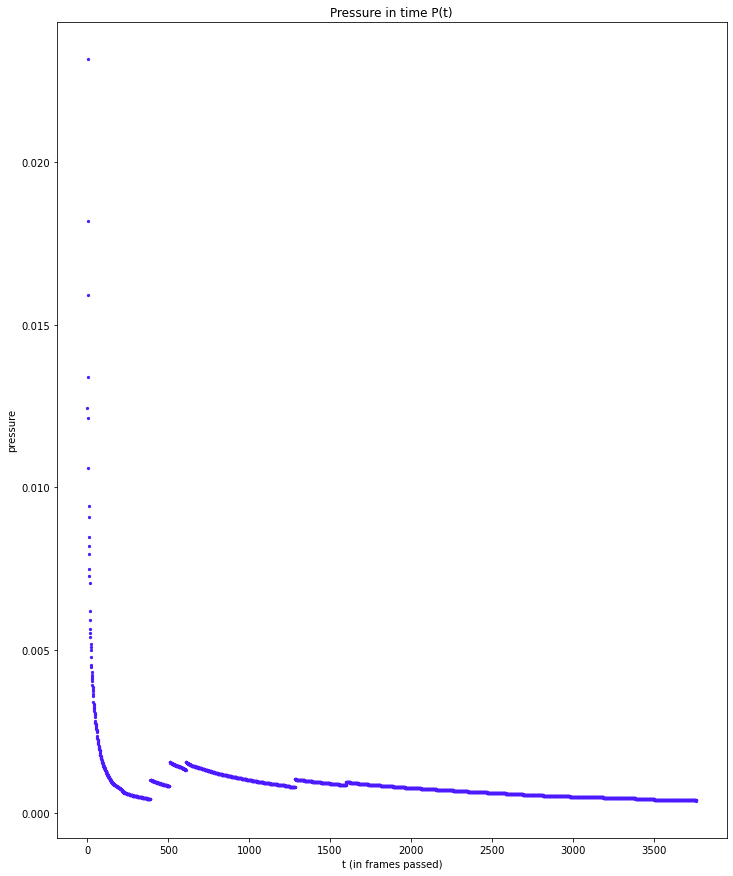

In [7]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 15))
x = np.arange(0, index)
plt.scatter(x, Pplot[0:index], s=5, color = [(0.3,0.1,1)])
plt.title("Pressure in time P(t)")
plt.xlabel("t (in frames passed)")
plt.ylabel("pressure")
plt.show()

The initial pressure measurements are always going to be wonky as the change in velocity in over a very small change in time will yield weird values because of its instantaneous nature. Once the simulation runs longer and it gathers more data in time the pressure converges to its average value.


In case we don't heat up or cool down the box the pressure will quickly converge from the wonky beginning and remain more or less the same (due to conservation of energy). If we heat it up the pressure goes up, if we cool it down the pressure drops... just like in real life!

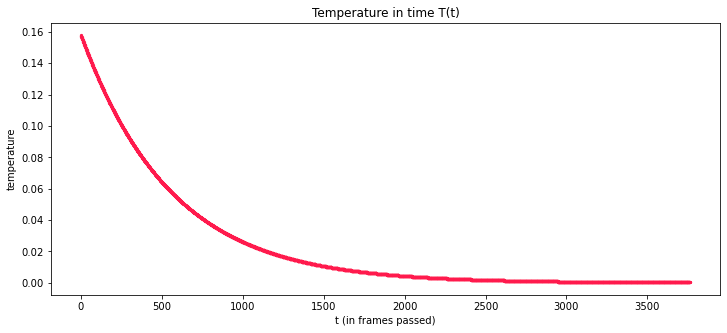

In [8]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
x = np.arange(0, index)
plt.scatter(x, Tplot[0:index], s=5, color = [(1,0.1,0.3)])
plt.title("Temperature in time T(t)")
plt.xlabel("t (in frames passed)")
plt.ylabel("temperature")
plt.show()

Temperature is generally quite consitent in its behaviour mainly because of the less random way of measuring it which is the sum of the squares of all component velocities which no matter how the balls behave and bounce it will remain the same (due to the conservation of energy once again).

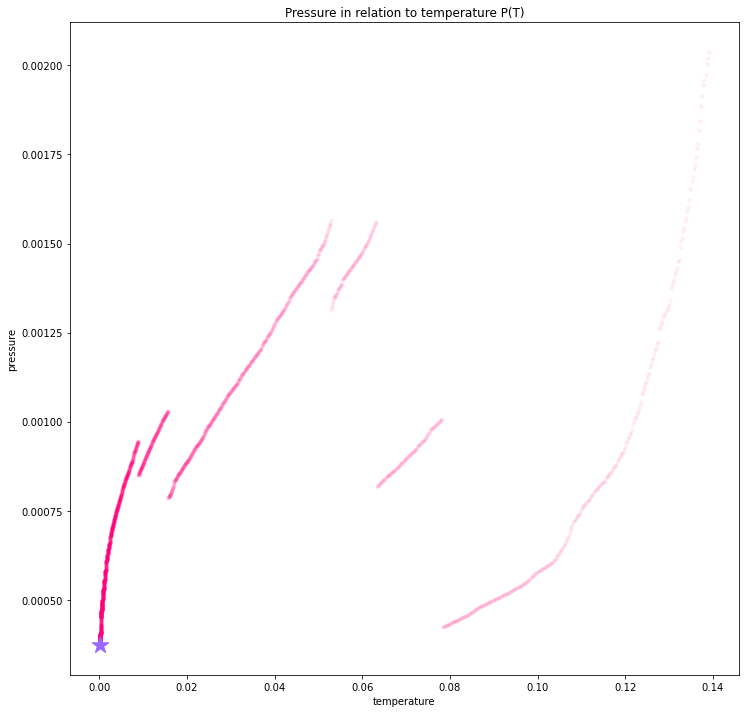

In [9]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
plt.scatter(Tplot[70:index], Pplot[70:index], s=10, color = [(1,0,0.5)], alpha=0.05)
plt.scatter(Tplot[index-1], Pplot[index-1], s=300, color = [(0.6,0.4,1)], marker = '*')
plt.title("Pressure in relation to temperature P(T)")
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.show()

*the beginning of cooling down/ heating up is a little bit shaky due to the same reason mentioned previously.

Finally the cherry on the top, from the 'ideal gas law' we know that $PV=nRT$. Rearranging the variables we get $P=\frac{nR}{V}\,T$. The size ('volume') of the box is constant, so is $n$ and $R$, so what we obtain is a linear equation in the form of $P=\alpha \,T$. And in fact when we check it with the simulation it indeed indicates a linear relationship $P(T)$! But just as in mathematics we avoid dividing by zero as then very wierd things happen, in the same way I was also thaught that if the temperature drops close to the absolute zero I could as well just throw all my books about the basics of thermodynamics away through the window as the absolute zero also likes to bother the naive undergraduate students with its strange behaviour. Surprsingly, when we start cooling down the box the $P(T)$ relation is still a linear one, untill we start approaching the heat death of the system... in that case the $P(T)$ completely derails from the line it was following heading straight towards the eternal static state, where movement, work, and even time does not exist!

# Reflections

In the beginning I was afraid that I might be trying to bite more than I can chew with this assignment. But I took the risk and it allowed me to learn a lot about simulation, especially how computer simulations can be very helpful in understanding the real world phenomena. Think twice the next time when experiencing déjà vu... it might be a glitch in the $m̴̻͝a̵͙̾͛̇ẗ̴̯́̽r̷̩̮̆i̶̊̇ͅẍ̵̟́̑̂$!


Talking about glitches, it surely still does have a lot of it... maybe I will manage to fix it later on my own as I really like working on it. In order to make it work I have to implement a reliable way of putting the particles back into the right (not overlapping) positions once they hit each other, I already tinkered around with it but so far it doesn't seem to work. The next main problem is a deep revision of the collision checking algorithm as this is the most likely reason for the even number of particles to start just going through each other sometimes.

Furthermore, in my preliminary feedback I was told "In some cases the energy seems not to be conserved." Having graphed the plots $P(t)$, $T(t)$ and $P(T)$, I did not notice anything indicating that the energy is not conserved as it seems to obey the theoretical physical model except for the very beginning when the program still needs to collect more data and on the very end for cooling down when approaching heat death. Of course unless we allow for some glitches altough as I tested it, the simulation still seems to hold to the model for when there is not many glitches.

Lastly, here are some further ideas/things that couldn't be implemented due to the time costraints and can be implemented later:

1. //Fully randomised particle initialisator// - All it would ask for would be the number of particles and then it would generate not overlapping particles with velocities from nomral distriobution (indiciating when there just physically is no more space for more particles would aslo be cool). I found checking for the overlap and then vstacking the array representation of the particles to be the main issue here.
2. //Emergency separator// - it should detect when the particles are clearly into each other and just separate them in some way.
3. General optimisation as 600 fps is surely an accurate way of conducting a simulation although not entirely good for greater number of particles.

Now I will surely look differently at games and the complexity of physcis implemented in them :D